Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 2383 Борисов Иван Вадимович и Сыздыков Нургалым Конакбаевич. Вариант №8.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

**Дискретный единичный скачок**

$$
  \sigma_d(k) = \begin{cases}
  1, & k \ge 0 \\
  0, & k < 0
  \end{cases}
$$

**Дискретный прямоугольный импульс**

Дискретный прямоугольный импульс $s_1(k)$ с амплитудой $U$, начинающийся в момент $n_0$ и имеющий длительность $n_{imp}$ отсчетов, может быть представлен как разность двух взвешенных и задержанных дискретных единичных скачков $\sigma_d(k)$.

$$
  s_1(k) = U \cdot [\sigma_d(k - n_0) - \sigma_d(k - (n_0 + n_{imp}))]
$$

**Линейная комбинация сигналов**

Линейная комбинация сигналов $-$ это взвешенное суммирование нескольких сигналов. Если у нас есть три сигнала $x_1(k), x_2(k), x_3(k)$ и три весовых коэффициента $a_1, a_2, a_3$, их линейная комбинация $s_2(k)$ вычисляется как:
$$
  s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k)
$$

Это соответствует поэлементному умножению каждой последовательности на ее коэффициент и последующему поэлементному сложению результатов.

**Характеристики дискретной последовательности**

  *   **Среднее значение ($\mu$)**: Арифметическое среднее всех отсчетов последовательности на заданном интервале длиной $L$.
  $$
    \mu = \frac{1}{L} \sum_{k=0}^{L-1} s_2(k)
  $$
  *   **Энергия ($E$)**: Сумма квадратов значений всех отсчетов последовательности. Для ЦОС это аналог интеграла от квадрата аналогового сигнала.
  $$
    E = \sum_{k=0}^{L-1} [s_2(k)]^2
  $$
  *   **Средняя мощность ($P$)**: Энергия сигнала, отнесенная к его длительности (количеству отсчетов $L$).
  $$
    P = \frac{E}{L} = \frac{1}{L} \sum_{k=0}^{L-1} [s_2(k)]^2
  $$

Сигнал $s_3(k)$ представляет собой произведение двух последовательностей:
1.  **Дискретный гармонический сигнал (несущее колебание):** $s(k) = C \cos(\hat{\omega}_0 k)$
2.  **Экспоненциальная огибающая:** $|a|^k$

Таким образом, аналитическая формула для итогового сигнала $s_3(k)$ выглядит следующим образом:
$$
  s_3(k) = |a|^k \cdot C \cos(\hat{\omega}_0 k)
$$

**Периодическая последовательность**

Периодическая последовательность $s_p(k)$ с периодом $T_p$ может быть смоделирована на основе функции $s_{period}(k)$, описывающей один ее период (от $k=0$ до $k=T_p-1$), с помощью операции взятия остатка от деления:

$$
s_p(k) = s_{period}(k \mod T_p)
$$

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Пункты работы выполняется с помощью кода.

# Константы

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

# Номер бригады
Nb = 8

# Длина последовательности
N = 30 + Nb % 5

# Основание экспоненты
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))

# Амплитуда гармонического сигнала
C = 1 + Nb % 5

# Частота гармонического сигнала
w0 = np.pi / (6 + Nb % 5)

# Амплитуда импульса
U = Nb % 20 + 1

# Начальный момент импульса
n0 = 3 + Nb % 5

# Длина импульса
n_imp = 5 + Nb % 5

# Амплитуды гармонических сигналов
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5
B_vector = np.array([B1, B2, B3])

# Частоты гармонических сигналов
w1 = np.pi / (4 + Nb % 5)
w2 = np.pi / (8 + Nb % 5)
w3 = np.pi / (16 + Nb % 5)
w_vector = np.array([w1, w2, w3])

# Коэффициенты линейной комбинации гармонических сигналов
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5
A_coeffs = np.array([a1, a2, a3])

# Время
n_vector = np.arange(N)

# Пункт №1

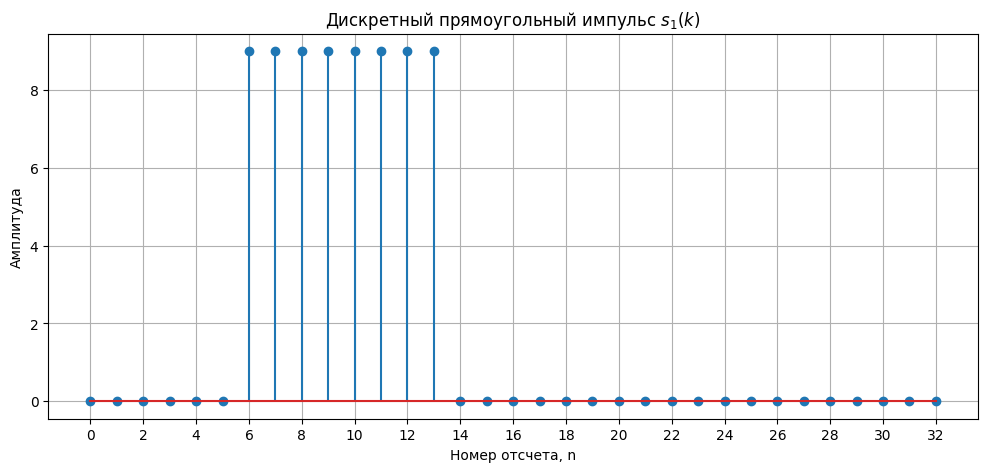

In [2]:
# Функция дискретного единичного скачка
def sigma_d(k):
  return 1 if k >= 0 else 0

# Дискретный прямоугольный импульс
def s_1(k, U, n0, n_imp):
  return U * (sigma_d(k - n0) - sigma_d(k - (n0 + n_imp)))

# Сигнал для каждого отсчета на интервале [0, N-1]
s1_signal = [s_1(k, U, n0, n_imp) for k in n_vector]


# График
plt.figure(figsize=(12, 5))
plt.stem(n_vector, s1_signal)
plt.title(r'Дискретный прямоугольный импульс $s_1(k)$')
plt.xlabel('Номер отсчета, n')
plt.ylabel('Амплитуда')
plt.xticks(np.arange(0, N, 2))
plt.grid(True)
plt.show()

# Пояснение процесса моделирования

Моделирование прямоугольного импульса $s_1(k)$ выполняется путем линейной комбинации двух дискретных единичных скачков $\sigma_d(k)$:

1.  Создается включающий сигнал $\sigma_d(k - n_0)$, который равен 1, начиная с отсчета $k=n_0$.
2.  Создается выключающий сигнал $\sigma_d(k - (n_0 + n_{imp}))$, который равен 1, начиная с отсчета $k = n_0 + n_{imp}$.
3.  Из включающего сигнала вычитается выключающий. Их разность равна 1 только в интервале $n_0 \le k \le n_0 + n_{imp} - 1$, и 0 во всех остальных точках.
4.  Полученная последовательность из нулей и единиц умножается на заданную амплитуду $U$, формируя итоговый прямоугольный импульс.

# Пункт №2

Характеристики сигнала s2(k)
Среднее значение (mean_s2): 1.5678
Энергия (E): 57255.4667
Средняя мощность (P): 347.0028


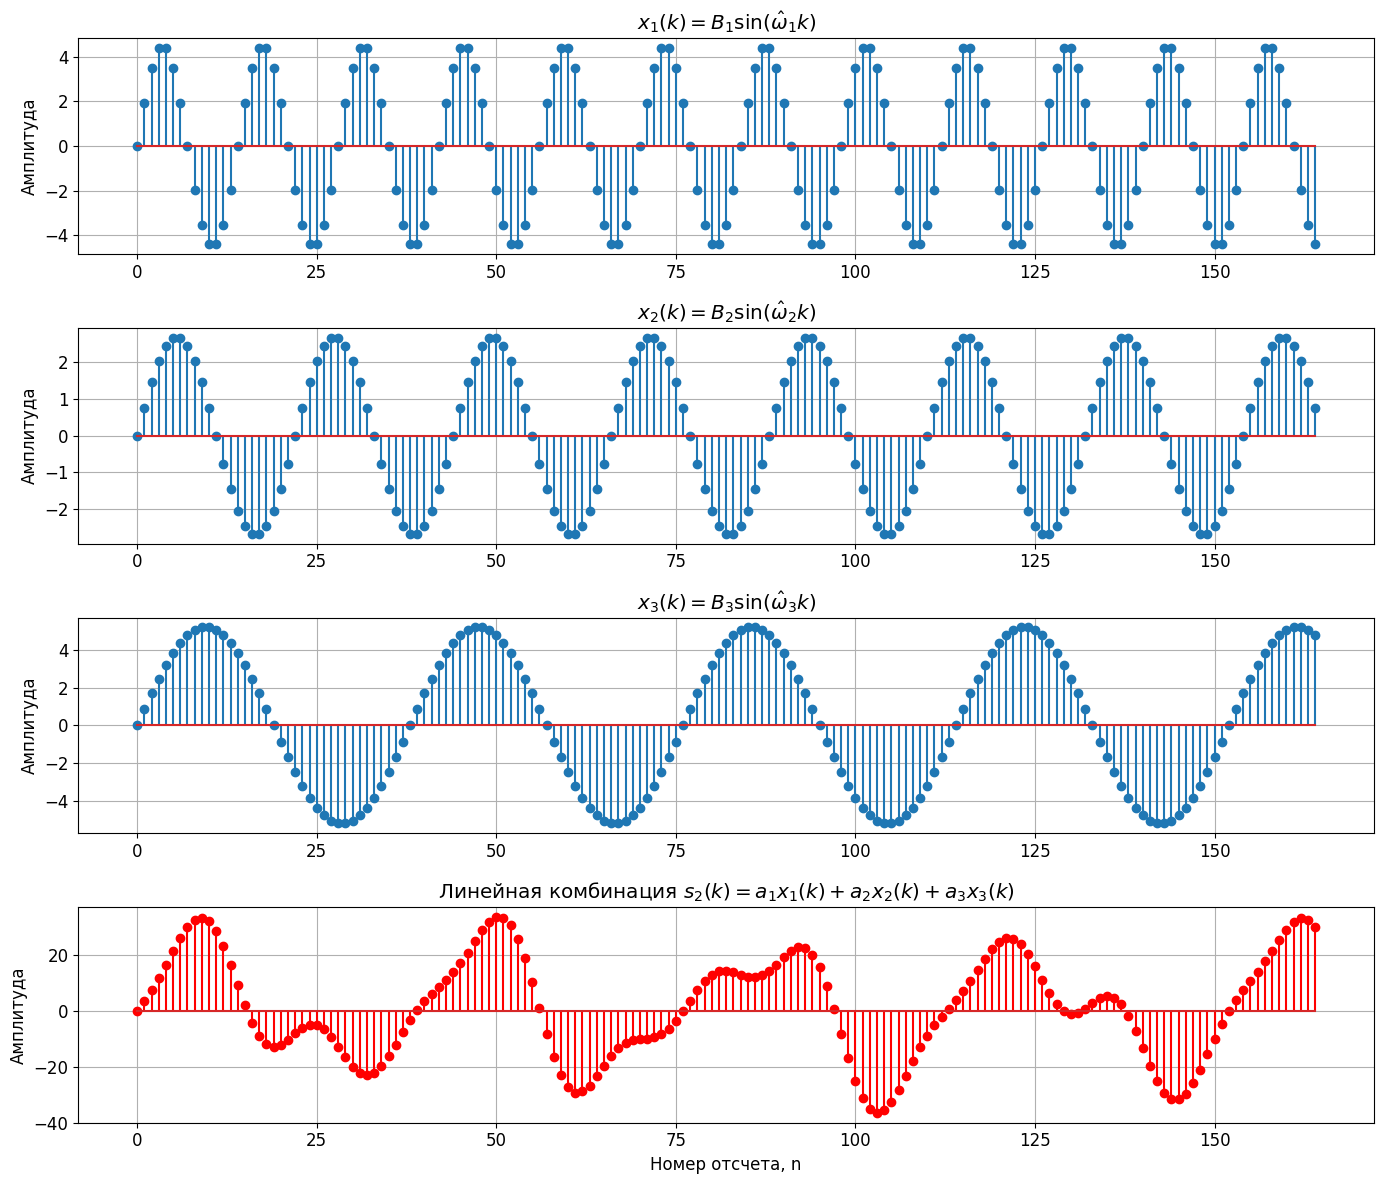

In [3]:
# Длина последовательности и вектор нормированного времени
N_s2 = 5 * N
n_vector_s2 = np.arange(N_s2)

# Моделирование гармонических сигналов
x_signals = np.zeros((N_s2, 3))
for i in range(3):
    x_signals[:, i] = B_vector[i] * np.sin(w_vector[i] * n_vector_s2)

# Моделирование s_2(k)
s2_signal = x_signals @ A_coeffs

# Характеристики
L = len(s2_signal)
mean_s2 = np.mean(s2_signal)
E = np.sum(s2_signal**2)
P = E / L

print("Характеристики сигнала s2(k)")
print(f"Среднее значение (mean_s2): {mean_s2:.4f}")
print(f"Энергия (E): {E:.4f}")
print(f"Средняя мощность (P): {P:.4f}")

# Графики
plt.rcParams['figure.figsize'] = [14, 12]
plt.rcParams['font.size'] = 12

# Сигнал x1(k)
plt.subplot(4, 1, 1)
plt.stem(n_vector_s2, x_signals[:, 0])
plt.title(r'$x_1(k) = B_1 \sin(\hat{\omega}_1 k)$')
plt.ylabel('Амплитуда')
plt.grid(True)

# Сигнал x2(k)
plt.subplot(4, 1, 2)
plt.stem(n_vector_s2, x_signals[:, 1])
plt.title(r'$x_2(k) = B_2 \sin(\hat{\omega}_2 k)$')
plt.ylabel('Амплитуда')
plt.grid(True)

# Сигнал x3(k)
plt.subplot(4, 1, 3)
plt.stem(n_vector_s2, x_signals[:, 2])
plt.title(r'$x_3(k) = B_3 \sin(\hat{\omega}_3 k)$')
plt.ylabel('Амплитуда')
plt.grid(True)

# Линейная комбинация
plt.subplot(4, 1, 4)
plt.stem(n_vector_s2, s2_signal, linefmt='r-', markerfmt='ro')
plt.title(r'Линейная комбинация $s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k)$')
plt.xlabel('Номер отсчета, n')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.tight_layout()
plt.show()

# Пояснение

**a. Операции при моделировании линейной комбинации сигналов $s_2(k)$**

Моделирование выполняется в три этапа:
1.  **Генерация компонентов:** Сначала для каждого номера отсчета $k$ на заданном интервале вычисляются значения трех отдельных гармонических сигналов: $x_1(k)$, $x_2(k)$ и $x_3(k)$, где $x_i(k) = B_i \sin(\hat{\omega}_i k),i=1,2,3$.
2.  **Взвешивание (масштабирование):** Каждый из трех сигналов поэлементно умножается на свой весовой коэффициент: $a_1 x_1(k)$, $a_2 x_2(k)$ и $a_3 x_3(k)$.
3.  **Суммирование:** Три взвешенных сигнала поэлементно складываются, образуя итоговую последовательность $s_2(k)$.

**b. Как определяются указанные характеристики.**

*   **Среднее значение $mean_{s2}$** вычисляется как сумма всех $L$ отсчетов последовательности $s_2(k)$, деленная на их количество $L$. Так как сигнал является суммой синусоид, среднее значение которых равно нулю, его теоретическое среднее значение также равно нулю. Полученное в ходе моделирования значение $1.5678$ не совпадает с теоретическим, т.к. рассматривается достаточно маленький отрезок $n \in [0;5N-1]$, при большей длине отрезка среднее значение будет стремиться к нулю.
*   **Энергия $E$** вычисляется как сумма квадратов амплитуд всех отсчетов последовательности $s_2(k)$. Эта величина характеризует "полную энергию" сигнала на заданном конечном интервале.
*   **Средняя мощность $P$** вычисляется путем деления полной энергии $E$ на количество отсчетов $L$. Эта характеристика показывает среднюю энергию, приходящуюся на один отсчет сигнала.

# Пункт №3

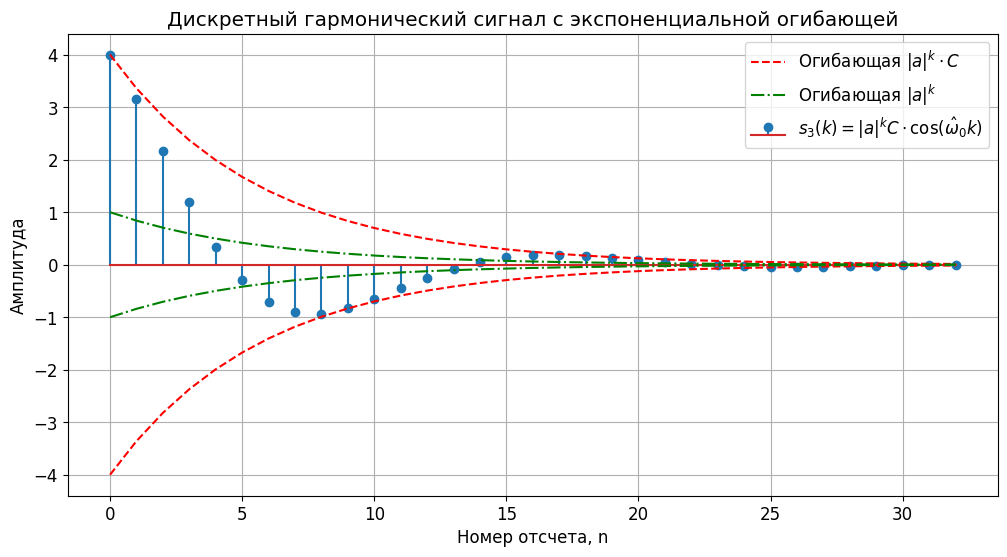

In [4]:
# Гармоническая составляющая (несущая)
carrier = C * np.cos(w0 * n_vector)
# Экспоненциальная огибающая
envelope = (np.abs(a)**n_vector)
# Итоговый сигнал
s3_signal = envelope * carrier

# Графики
plt.figure(figsize=(12, 6))

plt.stem(n_vector, s3_signal, label=r'$s_3(k) = |a|^k C \cdot \cos(\hat{\omega}_0 k)$')

plt.plot(n_vector, C * envelope, 'r--', label=r'Огибающая $|a|^k \cdot C$')
plt.plot(n_vector, C * -envelope, 'r--')
plt.plot(n_vector, envelope, 'g-.', label=r'Огибающая $|a|^k$')
plt.plot(n_vector, -envelope, 'g-.')

plt.title('Дискретный гармонический сигнал с экспоненциальной огибающей')
plt.xlabel('Номер отсчета, n')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)
plt.show()

# Пояснение операций при моделировании

Моделирование сигнала $s_3(k)$ выполняется в три этапа:
1.  **Создание гармонической последовательности:** Генерируется дискретный косинусоидальный сигнал $C \cos(\hat{\omega}_0 k)$ для всех отсчетов $k \in [0;N-1]$.

2.  **Создание экспоненциальной огибающей:** Генерируется последовательность значений экспоненциальной огибающей $|a|^k$ для тех же отсчетов $k \in [0;N-1]$.

3.  **Поэлементное умножение:** Итоговый сигнал $s_3(k)$ получается путем поэлементного перемножения двух созданных последовательностей: гармонической и экспоненциальной. Каждая точка косинусоиды умножается на соответствующее ей по времени значение экспоненты.

# Пункт №4

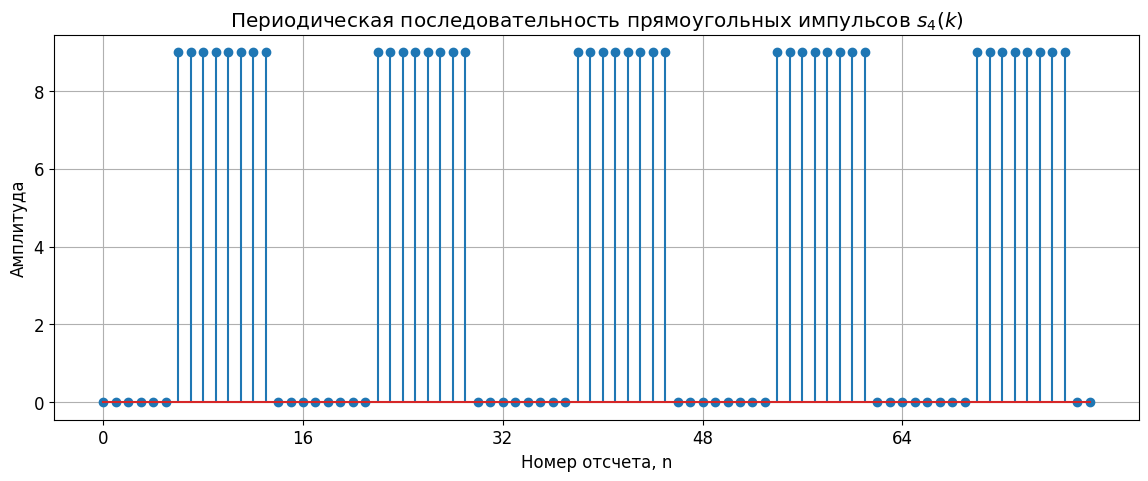

In [5]:
T_period = 2 * n_imp
num_periods = 5
N_total = num_periods * T_period
n_vector_s4 = np.arange(N_total)

# Моделирование
s4_signal = [s_1(k % T_period, U, n0, n_imp) for k in n_vector_s4]

# Графики
plt.figure(figsize=(14, 5))
plt.stem(n_vector_s4, s4_signal)
plt.title(r'Периодическая последовательность прямоугольных импульсов $s_4(k)$')
plt.xlabel('Номер отсчета, n')
plt.ylabel('Амплитуда')
plt.xticks(np.arange(0, N_total, T_period))
plt.grid(True)
plt.show()

# Пояснение

Моделирование выполняется в несколько шагов:

1.  **Определение периода.** По условию задачи, период $T_p$ вдвое больше длительности импульса $n_{imp}$, то есть $T_p = 2 \cdot n_{imp}$.

2.  **Периодическое повторение.** Для любого номера отсчета $k$ итоговой последовательности вычисляется его позиция внутри одного периода `k_local = k % T_period`.

3.  **Вычисление значения.** Полученное значение `k_local` подставляется в функцию-шаблон `s_1`. Таким образом, для каждого отсчета $k$ итогового сигнала вычисляется значение:
$$
  s_4(k) = s_1(k \mod T_p, U, n_0, n_{imp})
$$

## Выводы

В ходе выполнений практической работы с помощью программных средств было проведено моделирование и анализ следующих стандартных дискретных последовательностей:

* дискретного прямоугольного сигнала

* линейной комбинации дискретных гармонических сигналов
  * для данного сигнала были вычислены среднее значение, энергия и средняя мощность

* дискретного гармонического сигнала
  * для данного сигнала была определена аналитическая формула

* периодической последовательности дискретных прямоугольных импульсов

Для смоделированных сигналов были построены соответствующие графики последовательностей.